In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [3]:
train_df=pd.read_csv("D:\\machine learning projecsts folders\\realstate\\missing imputation\\gurgaon_properties_value_imputation")

In [4]:
train_df.sample(4)

,property_type,sector,price,bedRoom,bathroom,balcony,noOfFloor,agePossession,built_up_area,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score
3414,Flat,sector 90,1.26,3.0,3.0,3,6.0,Relatively New,3206.666667,1,0,0,0,0,2,28
2918,House,sector 3 phase 2,1.00,3.0,4.0,2,2.0,Relatively New,900.000000,0,0,0,0,0,0,0
2804,Flat,sector 92,1.18,4.0,4.0,3,8.0,Relatively New,2518.000000,0,0,1,0,0,0,108
3157,Flat,sector 2,0.40,1.0,1.0,1,5.0,Moderately Old,450.000000,0,0,0,0,0,2,39


# luxury_score

<Axes: xlabel='luxury_score', ylabel='Count'>

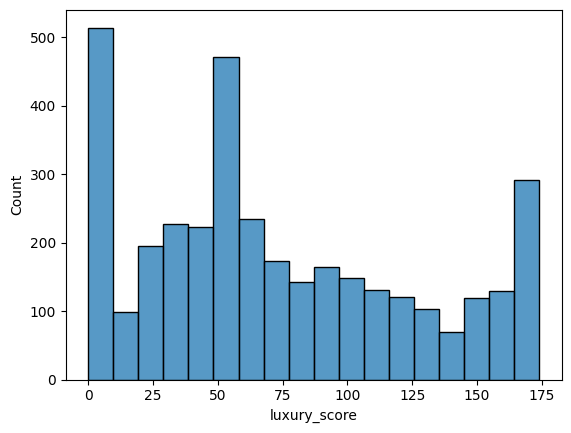

In [5]:
sns.histplot(train_df['luxury_score'])

In [6]:
train_df['luxury_score'].describe()

count    3555.000000
mean       72.440788
std        53.097341
min         0.000000
25%        34.000000
50%        60.000000
75%       111.000000
max       174.000000
Name: luxury_score, dtype: float64

changing the luxury score into catogorical column with the name of low ,meddium,high


In [7]:
def change_luxury_score(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bin

In [8]:
train_df['luxury_cat']=train_df['luxury_score'].apply(change_luxury_score)

In [9]:
train_df.sample()

,property_type,sector,price,bedRoom,bathroom,balcony,noOfFloor,agePossession,built_up_area,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score,luxury_cat
2904,House,sector 41,7.0,7.0,7.0,3+,3.0,Moderately Old,2475.0,0,1,1,1,1,1,151,High


change the floor number into cat columns 


<Axes: ylabel='Frequency'>

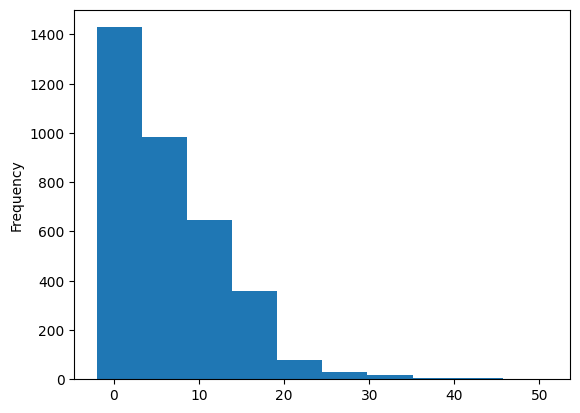

In [10]:
train_df['noOfFloor'].plot(kind='hist')

In [11]:
def change_floor(row):
    if 0<=row<5:
        return 'lower'
    elif 5<=row<15:
        return "mid"
    elif 15<=row<51:
        return 'high'
    else:
        return None
        

In [12]:
train_df['floor catt']=train_df['noOfFloor'].apply(change_floor)

In [13]:
train_df.sample(4)[['noOfFloor','floor catt']]

,noOfFloor,floor catt
2393,11.0,mid
3131,10.0,mid
633,11.0,mid
3191,20.0,high


In [14]:
train_df.sample(4)

,property_type,sector,price,bedRoom,bathroom,balcony,noOfFloor,agePossession,built_up_area,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score,luxury_cat,floor catt
2578,Flat,sector 90,1.95,4.0,3.0,3,7.0,Under Construction,1650.0,0,0,0,0,0,0,53,Medium,mid
786,House,sector 57,3.15,5.0,4.0,3+,2.0,Moderately Old,1548.0,0,0,0,1,0,2,60,Medium,lower
3314,House,sector 48,8.20,3.0,3.0,2,2.0,Moderately Old,3240.0,0,1,1,0,1,1,160,High,lower
1861,Flat,sector 69,1.72,4.0,4.0,1,12.0,Relatively New,1782.0,0,0,0,0,0,0,86,Medium,mid


droping these features as we dont want the user to say that they want 34 floor and soo on a. and also removing luxury score as it does not want the user to guess the luxury score thats why we  created a new columns with the cat columns and droping the rest 

In [15]:
train_df.drop(columns=['noOfFloor','luxury_score'],inplace=True)

In [16]:
train_df.sample()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,others,pooja room,servant room,store room,study room,furnishing_type,luxury_cat,floor catt
2713,Flat,sector 49,0.8,1.0,1.0,1,Moderately Old,720.0,0,0,0,0,0,0,Low,lower


In [17]:
from sklearn.preprocessing import OrdinalEncoder
data_label_encoded = train_df.copy()
categorical_cols = train_df.select_dtypes(include=['object']).columns
# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['Flat', 'House'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sect

# feature engineering

<Axes: >

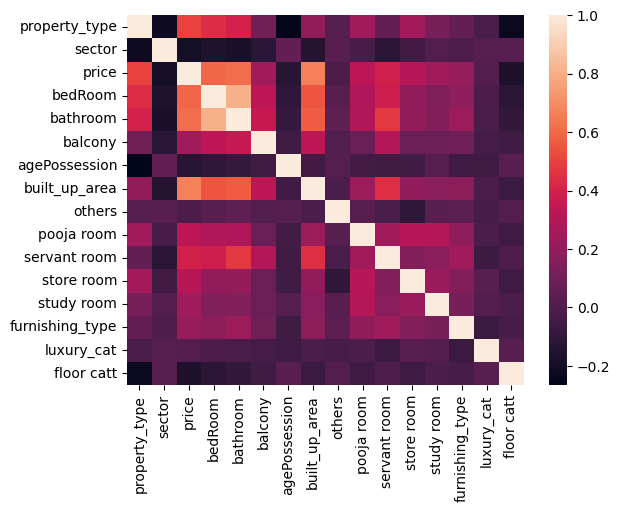

In [18]:
sns.heatmap(data_label_encoded.corr())

In [19]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'col_name','price':'corr'})\
    .sort_values('corr',ascending=False)
fi_df1

,col_name,corr
1,price,1.000000
6,built_up_area,0.667010
3,bathroom,0.609836
2,bedRoom,0.591352
9,servant room,0.392015
8,pooja room,0.319908
10,store room,0.305712
11,study room,0.243021
4,balcony,0.238991
12,furnishing_type,0.212857


using random forest feature importance or any tree base featire imprtance 

In [20]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_label,y_label)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [21]:
fi_rf=pd.DataFrame({
    "col_name":X_label.columns,
    "corr":model.feature_importances_
}).sort_values("corr",ascending=False)
fi_rf

,col_name,corr
6,built_up_area,0.422994
2,bedRoom,0.165963
0,property_type,0.156153
1,sector,0.113820
3,bathroom,0.044509
9,servant room,0.017916
5,agePossession,0.015251
4,balcony,0.014940
12,furnishing_type,0.008761
11,study room,0.008427


using gradient boost

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
model2=GradientBoostingRegressor()
model2.fit(X_label,y_label)

,"loss loss: {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'Loss function to be optimized. 'squared_error' refers to the squarederror for regression. 'absolute_error' refers to the absolute error ofregression and is a robust loss function. 'huber' is acombination of the two. 'quantile' allows quantile regression (use`alpha` to specify the quantile).See:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_quantile.py`for an example that demonstrates quantile regression for creatingprediction intervals with `loss='quantile'`.",'squared_error'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",100
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are""friedman_mse"" for the mean squared error with improvement score byFriedman, ""squared_error"" for mean squared error. The default value of""friedman_mse"" is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft 

In [23]:
fi_gb=pd.DataFrame({
    "col_name":X_label.columns,
    "corr":model2.feature_importances_
}).sort_values("corr",ascending=False)
fi_gb

,col_name,corr
6,built_up_area,0.402142
2,bedRoom,0.217777
0,property_type,0.146304
1,sector,0.119861
3,bathroom,0.064648
9,servant room,0.025583
5,agePossession,0.004327
10,store room,0.004023
8,pooja room,0.003847
4,balcony,0.003560


In [24]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_label,y_label,random_state=42,test_size=0.2)
model3=RandomForestRegressor(n_estimators=100,random_state=42)
model3.fit(x_train,y_train)
perm_imp=permutation_importance(model3,x_test,y_test,n_repeats=30,n_jobs=-1,random_state=42)

In [25]:
fi_pi=pd.DataFrame({
    "col_name":X_label.columns,
    "corr":perm_imp.importances_mean
}).sort_values("corr",ascending=False)
fi_pi

,col_name,corr
6,built_up_area,0.521986
0,property_type,0.189773
1,sector,0.173303
2,bedRoom,0.038665
9,servant room,0.019684
3,bathroom,0.015483
4,balcony,0.009569
5,agePossession,0.006476
13,luxury_cat,0.003949
11,study room,0.002800


lasso coff

In [26]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train_1=st.fit_transform(X_label)

In [27]:
model4=Lasso(alpha=0.2,random_state=41)
model4.fit(x_train_1,y_label)

,"alpha alpha: float, default=1.0Constant that multiplies the L1 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Lasso` object is not advised.Instead, you should use the :class:`LinearRegression` object.",0.2
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.",False
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",41
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


In [28]:
fi_lasso=pd.DataFrame({
    "col_name":X_label.columns,
    "corr":model4.coef_
}).sort_values("corr",ascending=False)
fi_lasso

,col_name,corr
6,built_up_area,1.162807
0,property_type,0.723770
3,bathroom,0.367727
2,bedRoom,0.122970
10,store room,0.103443
9,servant room,0.075474
11,study room,0.071270
8,pooja room,0.044273
5,agePossession,-0.000000
1,sector,-0.000000


In [29]:
# using linear regrstion model and first scaling the model
from sklearn.linear_model import LinearRegression
lg_reg=LinearRegression()
lg_reg.fit(x_train_1,y_label)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [30]:
fi_leg=pd.DataFrame({
    "col_name":X_label.columns,
    "corr":lg_reg.coef_
}).sort_values("corr",ascending=False)
fi_leg

,col_name,corr
6,built_up_area,1.233572
0,property_type,0.798189
3,bathroom,0.356428
11,study room,0.190116
9,servant room,0.187759
10,store room,0.181539
2,bedRoom,0.156591
12,furnishing_type,0.104346
8,pooja room,0.099188
13,luxury_cat,0.084103


In [31]:
# import shap

# # Compute SHAP values using the trained Random Forest model
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(x_train_1, y_label)

# explainer = shap.TreeExplainer(rf)
# shap_values = explainer.shap_values(x_train_1)

# # Summing the absolute SHAP values across all samples to get an overall measure of feature importance
# shap_sum = np.abs(shap_values).mean(axis=0)

# shap_values

using feature selection method provided in the sklearn lb

In [36]:
from sklearn.feature_selection import VarianceThreshold

# Initialize VarianceThreshold
vt = VarianceThreshold(threshold=0.8 * (1 - 0.8))  # 0.16

# Fit on the feature data
vt.fit(X_label)

# Get selected columns
selected_cols = X_label.columns[vt.get_support()]
print("Selected columns:")
print(selected_cols)

# Get removed columns
removed_cols = X_label.columns[~vt.get_support()]
print("\nRemoved columns:")
print(removed_cols)


Selected columns:
Index(['property_type', 'sector', 'bedRoom', 'bathroom', 'balcony',
       'agePossession', 'built_up_area', 'servant room', 'furnishing_type',
       'luxury_cat', 'floor catt'],
      dtype='object')

Removed columns:
Index(['others', 'pooja room', 'store room', 'study room'], dtype='object')


univarirent feature selction using kbest and classif

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import r_regression
kbest=SelectKBest(r_regression,k=11)
kbest.fit_transform(x_train_1,y_label)

array([[-0.51708769,  0.72888016,  0.50543539, ..., -0.48057848,
        -0.69909403,  1.05296408],
       [-0.51708769, -0.87705041, -0.87408309, ..., -0.48057848,
        -0.69909403,  1.05296408],
       [-0.51708769, -0.87705041, -0.87408309, ..., -0.48057848,
        -0.69909403, -0.39511611],
       ...,
       [-0.51708769, -0.87705041, -0.87408309, ..., -0.48057848,
        -0.69909403, -0.39511611],
       [-0.51708769, -0.87705041, -0.18432385, ...,  2.08082558,
        -0.69909403, -0.39511611],
       [-0.51708769,  0.72888016,  0.50543539, ..., -0.48057848,
        -0.69909403,  1.05296408]], shape=(3555, 11))

In [44]:
selected_c=X_label.columns[kbest.get_support()]
selected_c

Index(['property_type', 'bedRoom', 'bathroom', 'balcony', 'built_up_area',
       'pooja room', 'servant room', 'store room', 'study room',
       'furnishing_type', 'luxury_cat'],
      dtype='object')

In [43]:
notselected_c=X_label.columns[~kbest.get_support()]
notselected_c

Index(['sector', 'agePossession', 'others', 'floor catt'], dtype='object')

In [46]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesRegressor(n_estimators=50)
clf = clf.fit(X_label, y_label)
clf.feature_importances_
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_label)
X_new.shape

c:\Users\karan\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(3555, 6)

In [47]:
selected_c=X_label.columns[model.get_support()]
selected_c

Index(['property_type', 'sector', 'bedRoom', 'bathroom', 'built_up_area',
       'servant room'],
      dtype='object')